In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
months = [f"{x:02d}" for x in range(7,11)]
years = [f"{x:04d}" for x in range(150,330)]
i =0
result = np.zeros((720,950))

In [3]:
for yy in years:
    for mm in months:
        #data=nc.Dataset('/ihesp/xiliangdiao/ihespdata/ice300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.cice.h.'+yy+'-'+mm +'.aice.nc')
        #cmpr_B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.cice.h.0323-09.aice.nc
        data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ice300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.cice.h.'+yy+'-'+mm +'.hi.nc')
        plotvar = data.variables['hi'][0,:,:]
        #plotvar = data.variables['HMXL'][0,:,:]
        lont = data.variables['lont_bounds'][:,:,0]
        latt = data.variables['latt_bounds'][:,:,0]
        lont = lont[200:600,550:1500]
        latt = latt[200:600,550:1500]
        plotvar = plotvar[200:600,550:1500]

        aveplot = plotvar.mean(axis=0)
        
        result[i] = aveplot
        
        i = i + 1
#********************************************************************

In [4]:
result.shape

(720, 950)

In [5]:
seaice = result.mean(axis=1)

In [6]:
seaice.shape

(720,)

In [7]:
ww2 = np.convolve(seaice, np.ones((20,))/20, mode='valid')

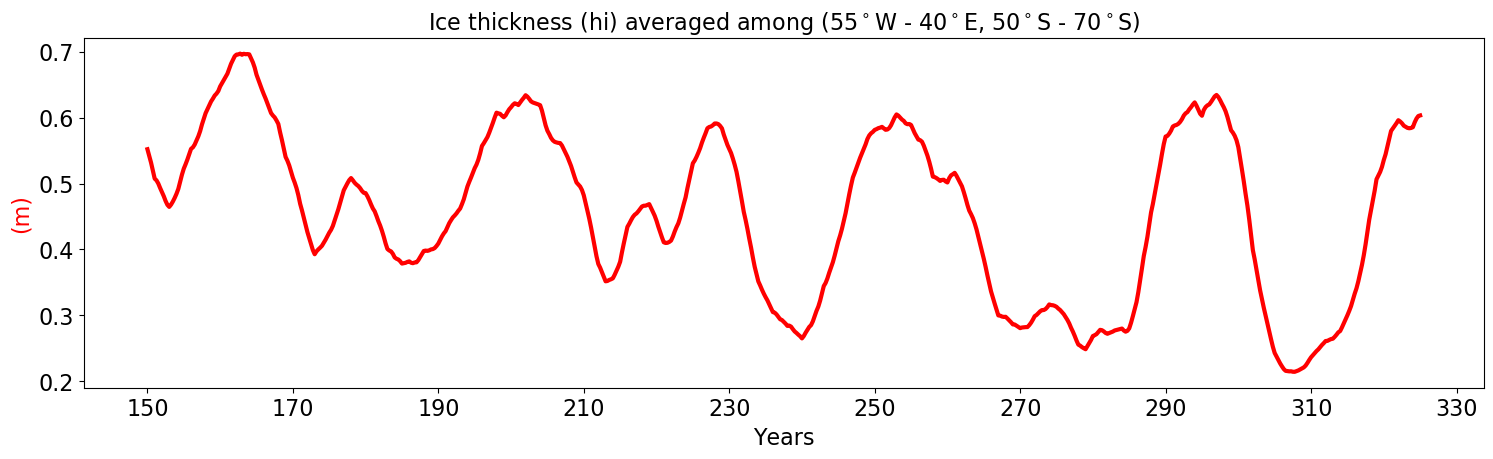

In [10]:
#t=np.arange(30,2131,1)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])
ax0.plot(ww2,'red',linewidth=3)
#ax0.plot(0.0001*result,'red',linewidth=3)
#########################################
plt.xticks(range(0,721,80), ['150', '170', '190', '210','230','250','270','290','310','330'],**my_font)
#plt.hlines(0, 0, 1200, colors = "blue",linestyles = "dashed")
plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('(m)',color= 'red',**my_font)
plt.axis("tight")
ax0.set_title('Ice thickness (hi) averaged among (55$^\circ$W - 40$^\circ$E, 50$^\circ$S - 70$^\circ$S)',**my_font)


plt.savefig("ww2.png",bbox_inches='tight',dpi=fig.dpi)